In [1]:
from google.colab import files
uploaded = files.upload()

Saving EV_Registrations_2025.xlsx to EV_Registrations_2025.xlsx


In [2]:
import pandas as pd

df = pd.read_excel("EV_Registrations_2025.xlsx")
df.head()

,Category,May‑2025 Registrations,April‑2025 Registrations
0,Electric 2-Wheelers,100281,92391
1,E-Rickshaws,40635,39522
2,Electric 3W (Passenger L5),14988,13129
3,Electric 3W (Goods L5),2425,2422
4,Electric Carts,7969,7460


In [3]:
df.columns

Index(['Category', 'May‑2025 Registrations', 'April‑2025 Registrations'], dtype='object')

In [4]:
!git clone https://github.com/RGS-AI/AICTE_Internships.git

Cloning into 'AICTE_Internships'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 255 (delta 46), reused 16 (delta 16), pack-reused 145 (from 1)
Receiving objects: 100% (255/255), 40.65 MiB | 18.14 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [5]:
%cd AICTE_Internships/2025/July_2025

/content/AICTE_Internships/2025/July_2025


In [6]:
!python3 your_script_name.py

python3: can't open file '/content/AICTE_Internships/2025/July_2025/your_script_name.py': [Errno 2] No such file or directory


In [7]:
{
  "cells": [
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "ehixESohweWf"
      },
      "source": [
        "## EV Adoption Forecasting\n",
        "As electric vehicle (EV) adoption surges, urban planners need to anticipate infrastructure needs—especially charging stations. Inadequate planning can lead to bottlenecks, impacting user satisfaction and hindering sustainability goals.\n",
        "\n",
        "**Problem Statement:** Using the electric vehicle dataset (which includes information on EV populations, vehicle types, and possibly historical charging usage), create a model to forecast future EV adoption. For example, predict the number of electric vehicles in upcoming years based on the trends in the data.\n",
        "\n",
        "**Goal:** Build a regression model that forecasts future EV adoption demand based on historical trends in EV growth, types of vehicles, and regional data.\n",
        "\n",
        "**Dataset:** This dataset shows the number of vehicles that were registered by Washington State Department of Licensing (DOL) each month. The data is separated by county for passenger vehicles and trucks.\n",
        "\n",
        "- Date: Counts of registered vehicles are taken on this day (the end of this month). - 2017-01-31\n",
        "2024-02-29\n",
        "- County: This is the geographic region of a state that a vehicle's owner is listed to reside within. Vehicles registered in Washington\n",
        "- State: This is the geographic region of the country associated with the record. These addresses may be located in other\n",
        "- Vehicle Primary Use: This describes the primary intended use of the vehicle.(Passenger-83%, Truck-17%)\n",
        "- Battery Electric Vehicles (BEVs): The count of vehicles that are known to be propelled solely by an energy derived from an onboard electric battery.\n",
        "- Plug-In Hybrid Electric Vehicles (PHEVs): The count of vehicles that are known to be propelled from energy partially sourced from an onboard electric battery\n",
        "- Electric Vehicle (EV) Total: The sum of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs).\n",
        "- Non-Electric Vehicle Total: The count of vehicles that are not electric vehicles.\n",
        "- Total Vehicles: All powered vehicles registered in the county. This includes electric vehicles.\n",
        "- Percent Electric Vehicles: Comparison of electric vehicles versus their non-electric counterparts.\n",
        "\n",
        "**Dataset Link:** https://www.kaggle.com/datasets/sahirmaharajj/electric-vehicle-population-size-2024/data"
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "QbTMxiWLwu3f"
      },
      "source": [
        "### Import Required Libraries"
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {},
      "source": [
        "### pip install pandas numpy matplotlib seaborn scikit-learn # global env"
      ]
    },
    {
      "cell_type": "code",
      "execution_count": 1,
      "metadata": {
        "id": "NBiyEbTKv90E"
      },
      "outputs": [],
      "source": [
        "import joblib\n",
        "import numpy as np\n",
        "import pandas as pd\n",
        "import seaborn as sns\n",
        "import matplotlib.pyplot as plt\n",
        "from sklearn.preprocessing import LabelEncoder\n",
        "from sklearn.ensemble import RandomForestRegressor\n",
        "from sklearn.model_selection import train_test_split\n",
        "from sklearn.model_selection import RandomizedSearchCV\n",
        "from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score"
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "Y759bVGNw7Nn"
      },
      "source": [
        "### Load Dataset"
      ]
    },
    {
      "cell_type": "code",
      "execution_count": 2,
      "metadata": {
        "id": "S23gy9mBw6kA"
      },
      "outputs": [],
      "source": [
        "# Load data\n",
        "df = pd.read_csv(\"Electric_Vehicle_Population_By_County.csv\")"
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "pY_gBbyexa5Q"
      },
      "source": [
        "### Explore and Understand the Data"
      ]
    },
    {
      "cell_type": "code",
      "execution_count": 3,
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "d9QtVSR7xKMw",
        "outputId": "add353bc-6d8a-4bd8-9a67-0eebd5f9d183"
      },
      "outputs": [
        {
          "data": {
            "text/html": [
              "<div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>Date</th>\n",
              "      <th>County</th>\n",
              "      <th>State</th>\n",
              "      <th>Vehicle Primary Use</th>\n",
              "      <th>Battery Electric Vehicles (BEVs)</th>\n",
              "      <th>Plug-In Hybrid Electric Vehicles (PHEVs)</th>\n",
              "      <th>Electric Vehicle (EV) Total</th>\n",
              "      <th>Non-Electric Vehicle Total</th>\n",
              "      <th>Total Vehicles</th>\n",
              "      <th>Percent Electric Vehicles</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>September 30 2022</td>\n",
              "      <td>Riverside</td>\n",
              "      <td>CA</td>\n",
              "      <td>Passenger</td>\n",
              "      <td>7</td>\n",
              "      <td>0</td>\n",
              "      <td>7</td>\n",
              "      <td>460</td>\n",
              "      <td>467</td>\n",
              "      <td>1.50</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>December 31 2022</td>\n",
              "      <td>Prince William</td>\n",
              "      <td>VA</td>\n",
              "      <td>Passenger</td>\n",
              "      <td>1</td>\n",
              "      <td>2</td>\n",
              "      <td>3</td>\n",
              "      <td>188</td>\n",
              "      <td>191</td>\n",
              "      <td>1.57</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>January 31 2020</td>\n",
              "      <td>Dakota</td>\n",
              "      <td>MN</td>\n",
              "      <td>Passenger</td>\n",
              "      <td>0</td>\n",
              "      <td>1</td>\n",
              "      <td>1</td>\n",
              "      <td>32</td>\n",
              "      <td>33</td>\n",
              "      <td>3.03</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>June 30 2022</td>\n",
              "      <td>Ferry</td>\n",
              "      <td>WA</td>\n",
              "      <td>Truck</td>\n",
              "      <td>0</td>\n",
              "      <td>0</td>\n",
              "      <td>0</td>\n",
              "      <td>3,575</td>\n",
              "      <td>3,575</td>\n",
              "      <td>0.00</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>July 31 2021</td>\n",
              "      <td>Douglas</td>\n",
              "      <td>CO</td>\n",
              "      <td>Passenger</td>\n",
              "      <td>0</td>\n",
              "      <td>1</td>\n",
              "      <td>1</td>\n",
              "      <td>83</td>\n",
              "      <td>84</td>\n",
              "      <td>1.19</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "</div>"
            ],
            "text/plain": [
              "                Date          County State Vehicle Primary Use  \\\n",
              "0  September 30 2022       Riverside    CA           Passenger   \n",
              "1   December 31 2022  Prince William    VA           Passenger   \n",
              "2    January 31 2020          Dakota    MN           Passenger   \n",
              "3       June 30 2022           Ferry    WA               Truck   \n",
              "4       July 31 2021         Douglas    CO           Passenger   \n",
              "\n",
              "  Battery Electric Vehicles (BEVs) Plug-In Hybrid Electric Vehicles (PHEVs)  \\\n",
              "0                                7                                        0   \n",
              "1                                1                                        2   \n",
              "2                                0                                        1   \n",
              "3                                0                                        0   \n",
              "4                                0                                        1   \n",
              "\n",
              "  Electric Vehicle (EV) Total Non-Electric Vehicle Total Total Vehicles  \\\n",
              "0                           7                        460            467   \n",
              "1                           3                        188            191   \n",
              "2                           1                         32             33   \n",
              "3                           0                      3,575          3,575   \n",
              "4                           1                         83             84   \n",
              "\n",
              "   Percent Electric Vehicles  \n",
              "0                       1.50  \n",
              "1                       1.57  \n",
              "2                       3.03  \n",
              "3                       0.00  \n",
              "4                       1.19  "
            ]
          },
          "execution_count": 3,
          "metadata": {},
          "output_type": "execute_result"
        }
      ],
      "source": [
        "df.head() # top 5 rows"
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "kLR7dqKU6KuO"
      },
      "source": [
        "Total 20819 data points and 10 features."
      ]
    },
    {
      "cell_type": "code",
      "execution_count": 4,
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 362
        },
        "id": "uuJSJUAXxdso",
        "outputId": "7aa65ed4-b868-4c79-f685-0b1b65895551"
      },
      "outputs": [
        {
          "data": {
            "text/plain": [
              "(20819, 10)"
            ]
          },
          "execution_count": 4,
          "metadata": {},
          "output_type": "execute_result"
        }
      ],
      "source": [
        "# no of rows and cols\n",
        "df.shape"
      ]
    },
    {
      "cell_type": "code",
      "execution_count": 5,
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "XSl8FNg9x245",
        "outputId": "a0ca3a06-b360-4ea5-8896-8a77f29f20a5"
      },
      "outputs": [
        {
          "name": "stdout",
          "output_type": "stream",
          "text": [
            "<class 'pandas.core.frame.DataFrame'>\n",
            "RangeIndex: 20819 entries, 0 to 20818\n",
            "Data columns (total 10 columns):\n",
            " #   Column                                    Non-Null Count  Dtype  \n",
            "---  ------                                    --------------  -----  \n",
            " 0   Date                                      20819 non-null  object \n",
            " 1   County                                    20733 non-null  object \n",
            " 2   State                                     20733 non-null  object \n",
            " 3   Vehicle Primary Use                       20819 non-null  object \n",
            " 4   Battery Electric Vehicles (BEVs)          20819 non-null  object \n",
            " 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object \n",
            " 6   Electric Vehicle (EV) Total               20819 non-null  object \n",
            " 7   Non-Electric Vehicle Total                20819 non-null  object \n",
            " 8   Total Vehicles                            20819 non-null  object \n",
            " 9   Percent Electric Vehicles                 20819 non-null  float64\n",
            "dtypes: float64(1), object(9)\n",
            "memory usage: 1.6+ MB\n"
          ]
        }
      ],
      "source": [
        "# Data Types, class and memory alloc\n",
        "df.info()"
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "ZNJam__V6e_m"
      },
      "source": [
        "As we could see, only Percent Eletric Vehicles is numeric."
      ]
    },
    {
      "cell_type": "code",
      "execution_count": 7,
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 397
        },
        "id": "oWPeCHLl2r9Z",
        "outputId": "4c833356-af6a-4e62-dfdd-15aea5fb2e20"
      },
      "outputs": [
        {
          "data": {
            "text/plain": [
              "Date                                         0\n",
              "County                                      86\n",
              "State                                       86\n",
              "Vehicle Primary Use                          0\n",
              "Battery Electric Vehicles (BEVs)             0\n",
              "Plug-In Hybrid Electric Vehicles (PHEVs)     0\n",
              "Electric Vehicle (EV) Total                  0\n",
              "Non-Electric Vehicle Total                   0\n",
              "Total Vehicles                               0\n",
              "Percent Electric Vehicles                    0\n",
              "dtype: int64"
            ]
          },
          "execution_count": 7,
          "metadata": {},
          "output_type": "execute_result"
        }
      ],
      "source": [
        "df.isnull().sum()"
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "d9ysoJ6G6TC-"
      },
      "source": [
        "Missing values in County and State."
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "ICPry5JN6ZgG"
      },
      "source": [
        "**Check if any column contain outliers.**"
      ]
    },
    {
      "cell_type": "code",
      "execution_count": 8,
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "nzyY1SFhVl-s",
        "outputId": "156079de-3b8e-4968-8359-5f355beca2db"
      },
      "outputs": [
        {
          "name": "stdout",
          "output_type": "stream",
          "text": [
            "lower_bound: -3.5174999999999996\n",
            "upper_bound: 6.9025\n",
            "Number of outliers in 'Percent Electric Vehicles': 2476\n"
          ]
        }
      ],
      "source": [
        "# Compute Q1 and Q3\n",
        "Q1 = df['Percent Electric Vehicles'].quantile(0.25)\n",
        "Q3 = df['Percent Electric Vehicles'].quantile(0.75)\n",
        "IQR = Q3 - Q1\n",
        "\n",
        "# Define outlier boundaries\n",
        "lower_bound = Q1 - 1.5 * IQR\n",
        "upper_bound = Q3 + 1.5 * IQR\n",
        "print('lower_bound:', lower_bound)\n",
        "print('upper_bound:', upper_bound)\n",
        "\n",
        "# Identify outliers\n",
        "outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | (df['Percent Electric Vehicles'] > upper_bound)]\n",
        "print(\"Number of outliers in 'Percent Electric Vehicles':\", outliers.shape[0])"
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "6Dk9O3sWyY86"
      },
      "source": [
        "### Data Preprocessing"
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "qNdrv53-FMZm"
      },
      "source": [
        "Basic Data Cleaning"
      ]
    },
    {
      "cell_type": "code",
      "execution_count": 9,
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 414
        },
        "id": "mNVgovQsoVAv",
        "outputId": "913c7a18-c0d9-4460-c6a2-96f0318ae464"
      },
      "outputs": [
        {
          "name": "stdout",
          "output_type": "stream",
          "text": [
            "Missing after fill:\n",
            "County    0\n",
            "State     0\n",
            "dtype: int64\n"
          ]
        },
        {
          "data": {
            "text/html": [
              "<div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>Date</th>\n",
              "      <th>County</th>\n",
              "      <th>State</th>\n",
              "      <th>Vehicle Primary Use</th>\n",
              "      <th>Battery Electric Vehicles (BEVs)</th>\n",
              "      <th>Plug-In Hybrid Electric Vehicles (PHEVs)</th>\n",
              "      <th>Electric Vehicle (EV) Total</th>\n",
              "      <th>Non-Electric Vehicle Total</th>\n",
              "      <th>Total Vehicles</th>\n",
              "      <th>Percent Electric Vehicles</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>2022-09-30</td>\n",
              "      <td>Riverside</td>\n",
              "      <td>CA</td>\n",
              "      <td>Passenger</td>\n",
              "      <td>7</td>\n",
              "      <td>0</td>\n",
              "      <td>7</td>\n",
              "      <td>460</td>\n",
              "      <td>467</td>\n",
              "      <td>1.50</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>2022-12-31</td>\n",
              "      <td>Prince William</td>\n",
              "      <td>VA</td>\n",
              "      <td>Passenger</td>\n",
              "      <td>1</td>\n",
              "      <td>2</td>\n",
              "      <td>3</td>\n",
              "      <td>188</td>\n",
              "      <td>191</td>\n",
              "      <td>1.57</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>2020-01-31</td>\n",
              "      <td>Dakota</td>\n",
              "      <td>MN</td>\n",
              "      <td>Passenger</td>\n",
              "      <td>0</td>\n",
              "      <td>1</td>\n",
              "      <td>1</td>\n",
              "      <td>32</td>\n",
              "      <td>33</td>\n",
              "      <td>3.03</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>2022-06-30</td>\n",
              "      <td>Ferry</td>\n",
              "      <td>WA</td>\n",
              "      <td>Truck</td>\n",
              "      <td>0</td>\n",
              "      <td>0</td>\n",
              "      <td>0</td>\n",
              "      <td>3,575</td>\n",
              "      <td>3,575</td>\n",
              "      <td>0.00</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>2021-07-31</td>\n",
              "      <td>Douglas</td>\n",
              "      <td>CO</td>\n",
              "      <td>Passenger</td>\n",
              "      <td>0</td>\n",
              "      <td>1</td>\n",
              "      <td>1</td>\n",
              "      <td>83</td>\n",
              "      <td>84</td>\n",
              "      <td>1.19</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "</div>"
            ],
            "text/plain": [
              "        Date          County State Vehicle Primary Use  \\\n",
              "0 2022-09-30       Riverside    CA           Passenger   \n",
              "1 2022-12-31  Prince William    VA           Passenger   \n",
              "2 2020-01-31          Dakota    MN           Passenger   \n",
              "3 2022-06-30           Ferry    WA               Truck   \n",
              "4 2021-07-31         Douglas    CO           Passenger   \n",
              "\n",
              "  Battery Electric Vehicles (BEVs) Plug-In Hybrid Electric Vehicles (PHEVs)  \\\n",
              "0                                7                                        0   \n",
              "1                                1                                        2   \n",
              "2                                0                                        1   \n",
              "3                                0                                        0   \n",
              "4                                0                                        1   \n",
              "\n",
              "  Electric Vehicle (EV) Total Non-Electric Vehicle Total Total Vehicles  \\\n",
              "0                           7                        460            467   \n",
              "1                           3                        188            191   \n",
              "2                           1                         32             33   \n",
              "3                           0                      3,575          3,575   \n",
              "4                           1                         83             84   \n",
              "\n",
              "   Percent Electric Vehicles  \n",
              "0                       1.50  \n",
              "1                       1.57  \n",
              "2                       3.03  \n",
              "3                       0.00  \n",
              "4                       1.19  "
            ]
          },
          "execution_count": 9,
          "metadata": {},
          "output_type": "execute_result"
        }
      ],
      "source": [
        "# Converts the \"Date\" column to actual datetime objects\n",
        "df['Date'] = pd.to_datetime(df['Date'], errors='coerce')\n",
        "\n",
        "# Removes rows where \"Date\" conversion failed\n",
        "df = df[df['Date'].notnull()]\n",
        "\n",
        "# Removes rows where the target (EV Total) is missing\n",
        "df = df[df['Electric Vehicle (EV) Total'].notnull()]\n",
        "\n",
        "# Fill missing values\n",
        "df['County'] = df['County'].fillna('Unknown')\n",
        "df['State'] = df['State'].fillna('Unknown')\n",
        "\n",
        "# Confirm remaining nulls\n",
        "print(\"Missing after fill:\")\n",
        "print(df[['County', 'State']].isnull().sum())\n",
        "\n",
        "df.head()"
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "G_JKm23vFUru"
      },
      "source": [
        "Remove Outliers: Cap the values to the IQR bounds"
      ]
    },
    {
      "cell_type": "code",
      "execution_count": 10,
      "metadata": {
        "colab": {
          "base_uri": "https://localhost:8080/"
        },
        "id": "DEaJ7RzvP8ky",
        "outputId": "7ca3b7a5-411b-4a82-db50-1042ffac69b0"
      },
      "outputs": [
        {
          "name": "stdout",
          "output_type": "stream",
          "text": [
            "Number of outliers in 'Percent Electric Vehicles': 0\n"
          ]
        }
      ],
      "source": [
        "# Cap the outliers - it keeps all the data while reducing the skew from extreme values.\n",
        "\n",
        "df['Percent Electric Vehicles'] = np.where(df['Percent Electric Vehicles'] > upper_bound, upper_bound,\n",
        "                                 np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound, df['Percent Electric Vehicles']))\n",
        "\n",
        "# Identify outliers\n",
        "outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | (df['Percent Electric Vehicles'] > upper_bound)]\n",
        "print(\"Number of outliers in 'Percent Electric Vehicles':\", outliers.shape[0])"
      ]
    }
  ],
  "metadata": {
    "accelerator": "GPU",
    "colab": {
      "gpuType": "T4",
      "provenance": []
    },
    "kernelspec": {
      "display_name": "Python 3",
      "name": "python3"
    },
    "language_info": {
      "codemirror_mode": {
        "name": "ipython",
        "version": 3
      },
      "file_extension": ".py",
      "mimetype": "text/x-python",
      "name": "python",
      "nbconvert_exporter": "python",
      "pygments_lexer": "ipython3",
      "version": "3.12.8"
    }
  },
  "nbformat": 4,
  "nbformat_minor": 0
}

{'cells': [{'cell_type': 'markdown',
   'metadata': {'id': 'ehixESohweWf'},
   'source': ['## EV Adoption Forecasting\n',
    'As electric vehicle (EV) adoption surges, urban planners need to anticipate infrastructure needs—especially charging stations. Inadequate planning can lead to bottlenecks, impacting user satisfaction and hindering sustainability goals.\n',
    '\n',
    '**Problem Statement:** Using the electric vehicle dataset (which includes information on EV populations, vehicle types, and possibly historical charging usage), create a model to forecast future EV adoption. For example, predict the number of electric vehicles in upcoming years based on the trends in the data.\n',
    '\n',
    '**Goal:** Build a regression model that forecasts future EV adoption demand based on historical trends in EV growth, types of vehicles, and regional data.\n',
    '\n',
    '**Dataset:** This dataset shows the number of vehicles that were registered by Washington State Department of Lic

<Axes: xlabel='Category'>

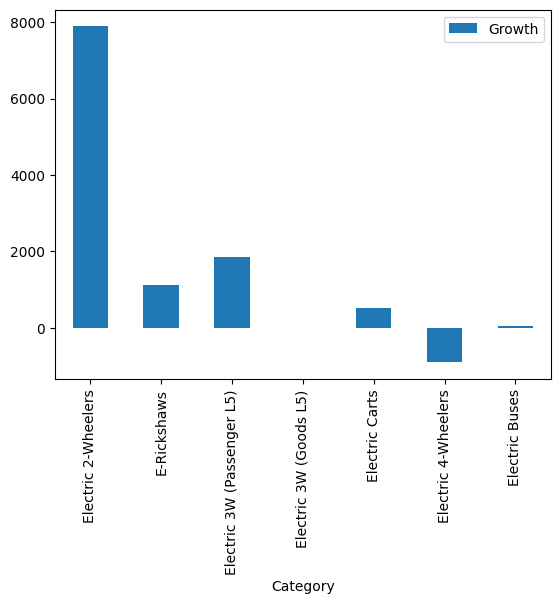

In [8]:
df['Growth'] = df['May‑2025 Registrations'] - df['April‑2025 Registrations']
df.plot(kind='bar', x='Category', y='Growth')

In [9]:
df.to_excel("EV_Output.xlsx", index=False)

In [10]:
from google.colab import files
files.download("EV_Output.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>